## Imports

In [1]:
from constants import TRAIN_CNN_FLUXES_PATH, \
                      TRAIN_CNN_AMP_PHASE_PATH, \
                      VALIDATION_CNN_FLUXES_PATH, \
                      VALIDATION_CNN_AMP_PHASE_PATH

from data_utils import load_numpy_data

from plot_utils import plot_map, \
                       plot_model_history, \
                       plot_fully_connected_amp_phase_prediction, \
                       plot_conv_amp_phase_prediction

from modeling_utils import create_fully_connected_architecture_for_amplitude_and_phase_reconstruction, \
                           create_convolutional_architecture_for_amplitude_and_phase_reconstruction, \
                           compile_model, \
                           train_model_with_generator, \
                           store_model

from configurations import SimpleConvolutional as ModelConfiguration

2024-02-05 13:24:40.742954: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-05 13:24:40.787418: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 13:24:40.787450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 13:24:40.788623: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 13:24:40.795740: I tensorflow/core/platform/cpu_feature_guar

## Load data

In the first place, define the data paths

In [2]:
validation_fluxes_array = load_numpy_data(VALIDATION_CNN_FLUXES_PATH)
validation_amp_phase_array = load_numpy_data(VALIDATION_CNN_AMP_PHASE_PATH)

## CONVOLUTIONAL MODEL

In [3]:
model_configuration = ModelConfiguration()
print(model_configuration.get_description())


	=== RetrainedSimpleConvolutional ===
	*ARCHITECTURE HYPERPARAMETERS:
		-Convolutional
		-Input shape: (55, 24, 1)
		-Output shape: (96, 96, 2)
		-Convolutional Layers: [128, 256, 512]
		-Convolutonal Kernels: [(3, 3), (3, 3), (3, 3)]
		-Fully Connected Hidden layers: [1000, 1000, 1000]
		-Regularizer: None
		-Convolutional Activation: relu
		-Hidden Layers Activation: relu
		-Output Layer Activation: linear
		-Batch Normalization: True
	
	*COMPILATION HYPERPARAMETERS:
		-Optimizer: ADAM lr=0.0001, beta_1=0.9, beta_2=0.999
		-Loss Function: MSE
		-Metric: MSE
	
	* TRAINING HYPERPARAMETERS:
		-Epochs: 30
		-Batch size: 32
		-Callbacks:
			-ReduceLROnPlateau: MSE 15 x0.1
			-Early Stop: MSE 50
	


2024-02-05 13:24:42.992438: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 13:24:43.114973: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 13:24:43.115477: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
model = create_convolutional_architecture_for_amplitude_and_phase_reconstruction(
    *model_configuration.unpack_architecture_hyperparameters()
)


Model: "RetrainedSimpleConvolutional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 22, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 11, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 9, 256)        295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 4, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 2, 512)        1180160   
                                                                 
 flatten (Flatten)           (None, 10

In [5]:
validation_fluxes_array.shape

(10000, 55, 24)

In [6]:
validation_amp_phase_array.shape

(10000, 96, 96, 2)

In [7]:
compile_model(
    model,
    *model_configuration.unpack_compilation_hyperparameters()
)

In [8]:
history = train_model_with_generator(
    model,
    TRAIN_CNN_FLUXES_PATH,
    TRAIN_CNN_AMP_PHASE_PATH,
    validation_fluxes_array,
    validation_amp_phase_array,
    *model_configuration.unpack_training_hyperparameters()
)

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/modeling_utils.py:660: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


Epoch 1/30


2024-02-05 13:24:46.939203: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-05 13:24:47.337909: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-05 13:24:47.839748: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-05 13:24:48.840116: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f888c2f91f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-05 13:24:48.840267: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-02-05 13:24:48.871399: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1707099889.313134   29302 devic

2188/2188 [==============================] - 75s 30ms/step - loss: 0.5114 - mean_squared_error: 0.5114 - val_loss: 0.6285 - val_mean_squared_error: 0.6285 - lr: 1.0000e-04
Epoch 2/30
2188/2188 [==============================] - 60s 28ms/step - loss: 0.4907 - mean_squared_error: 0.4907 - val_loss: 0.6287 - val_mean_squared_error: 0.6287 - lr: 1.0000e-04
Epoch 3/30
2188/2188 [==============================] - 61s 28ms/step - loss: 0.4772 - mean_squared_error: 0.4772 - val_loss: 0.6294 - val_mean_squared_error: 0.6294 - lr: 1.0000e-04
Epoch 4/30
2188/2188 [==============================] - 60s 28ms/step - loss: 0.4674 - mean_squared_error: 0.4674 - val_loss: 0.6302 - val_mean_squared_error: 0.6302 - lr: 1.0000e-04
Epoch 5/30
2188/2188 [==============================] - 61s 28ms/step - loss: 0.4601 - mean_squared_error: 0.4601 - val_loss: 0.6319 - val_mean_squared_error: 0.6319 - lr: 1.0000e-04
Epoch 6/30
2188/2188 [==============================] - 61s 28ms/step - loss: 0.4541 - mean_squa

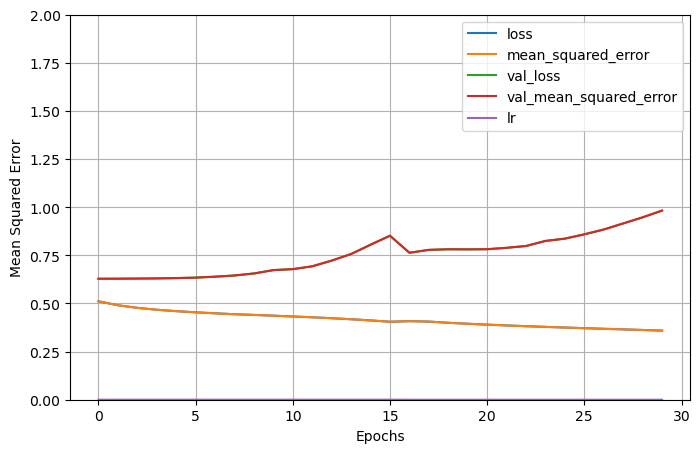

In [9]:
plot_model_history(history)

1/1 [==============================] - 0s 59ms/step


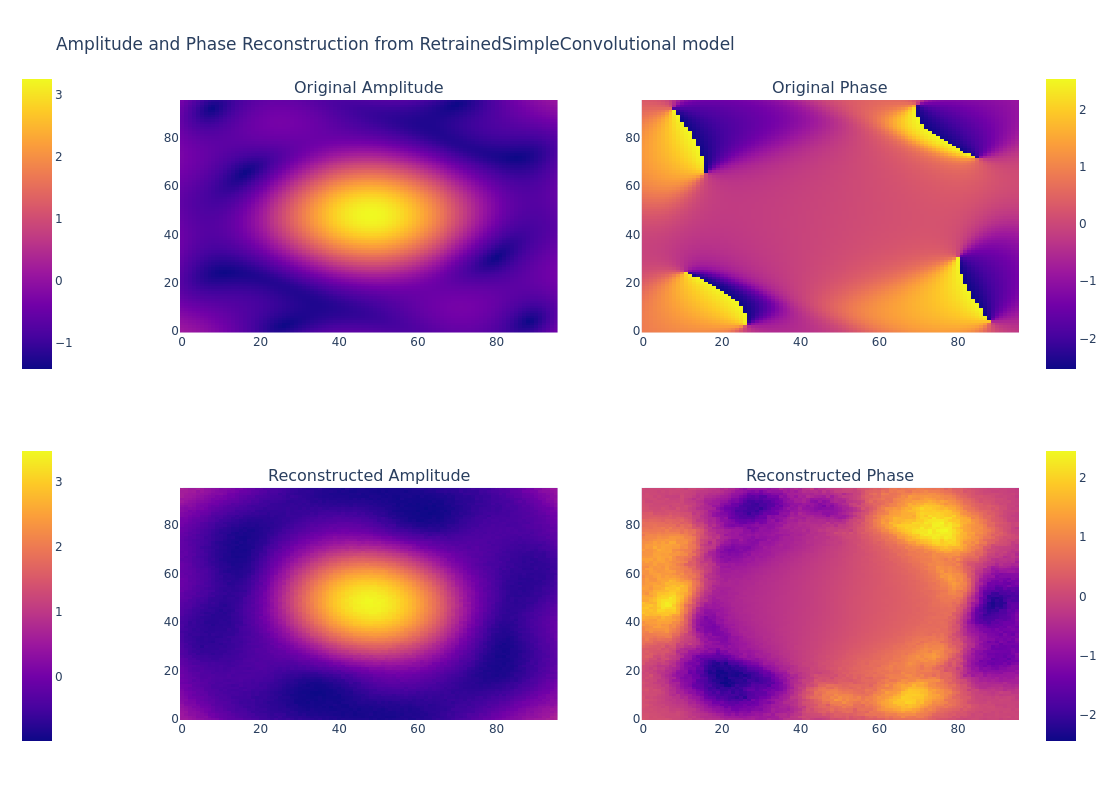

In [25]:
n = 106
plot_conv_amp_phase_prediction(
    model,
    validation_fluxes_array[n],
    validation_amp_phase_array[n]
    )

In [11]:
from constants import TRAIN_CNN_AMP_PHASE_PATH
train_fluxes_array = load_numpy_data(f"{TRAIN_CNN_FLUXES_PATH}00.npy")
train_amp_phase_array = load_numpy_data(f"{TRAIN_CNN_AMP_PHASE_PATH}00.npy")

1/1 [==============================] - 0s 91ms/step


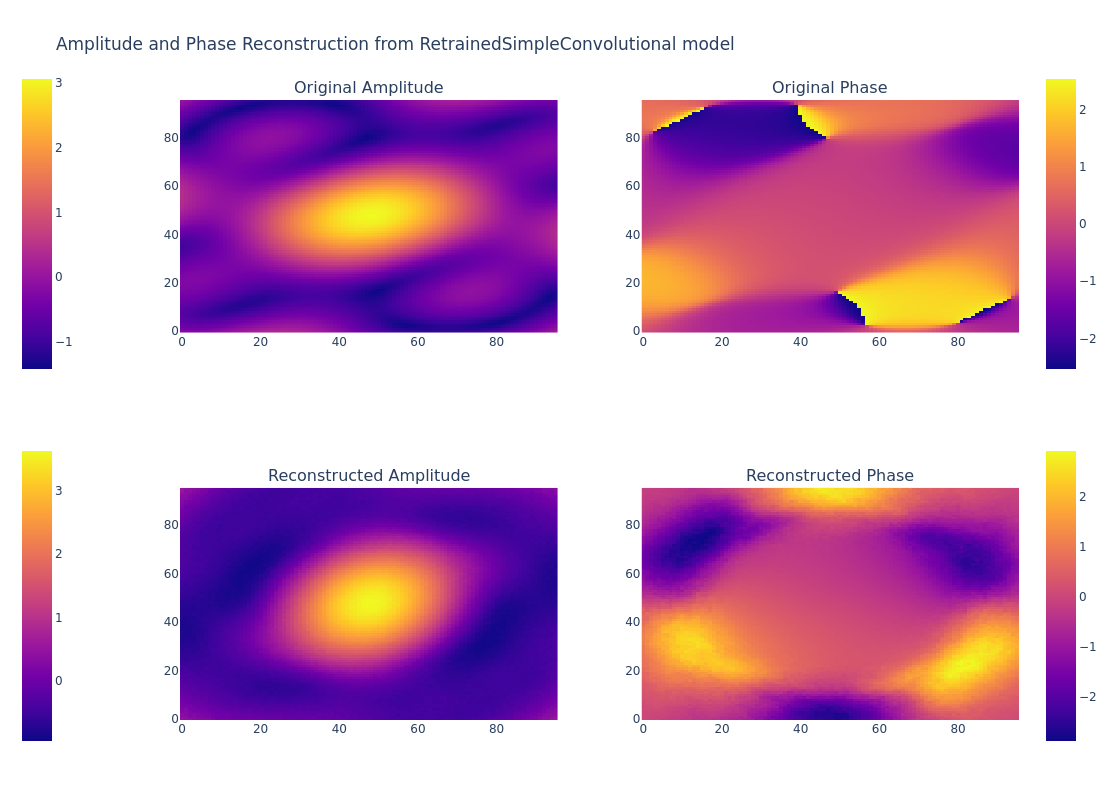

In [24]:
n = 106
plot_conv_amp_phase_prediction(
    model,
    train_fluxes_array[n],
    train_amp_phase_array[n]
    )

In [13]:
store_model(model,
            model.name,
            model_configuration.get_description())